# CNN 이진분류 (컬러 사진)
- cats and dogs 데이터셋
- 컬러 이미지 사용
- 로컬 PC에 저장되어있는 이미지 데이터를 로딩해서 학습시키기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

### 1.데이터 준비

```
!gdown https://drive.google.com/uc?id=1Zl5mt-tgrx3LOtk5dfYhYrqfRUVWRKdA
```

In [2]:
# 대용량인 경우 구글 드라이브에서 다운로드
!gdown https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR

Downloading...
From (original): https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR
From (redirected): https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR&confirm=t&uuid=1f4ccbff-fb63-45bc-9351-2c413073e050
To: /content/cats_and_dogs.zip
100% 68.6M/68.6M [00:04<00:00, 14.5MB/s]


In [3]:
!unzip -q 'cats_and_dogs.zip'

In [4]:
data_root = '/content/cats_and_dogs'
train_dir = data_root + '/train'
test_dir = data_root + '/test'

train_dir, test_dir

('/content/cats_and_dogs/train', '/content/cats_and_dogs/test')

In [5]:
# 배치 사이즈랑 이미지 크기를 미리 설정; 224는 보통 그래서. 별 의미는 없음
batch_size = 32
img_height = 224
img_width = 224

In [6]:
# 저장된 경로에서 훈련 데이터를 불러와서 4:1로 나눠줌
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2600 files belonging to 2 classes.
Using 2080 files for training.


In [7]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2600 files belonging to 2 classes.
Using 520 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


### 데이터 시각화

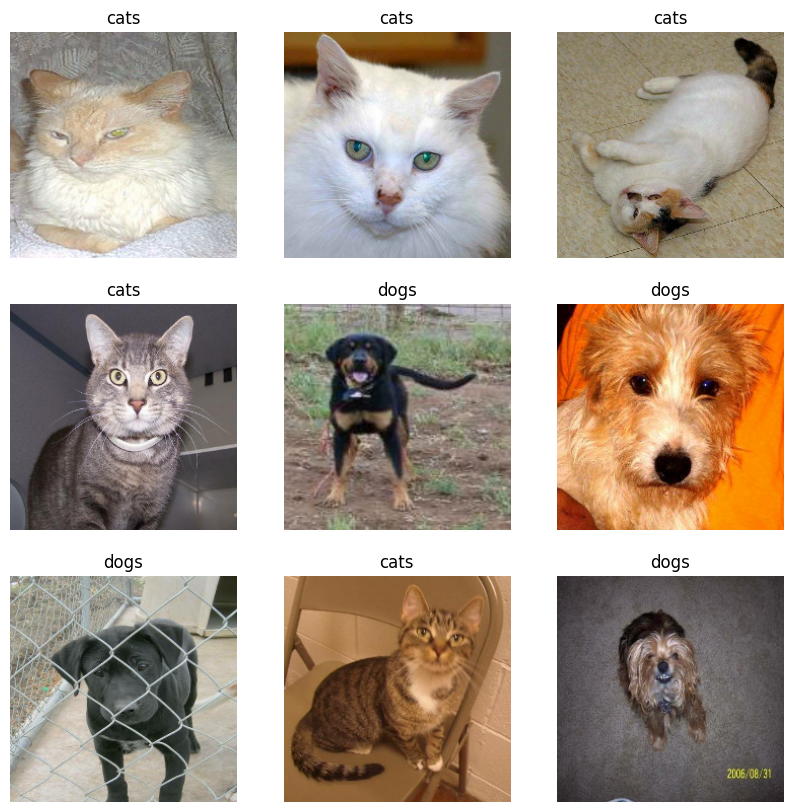

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
# 이미지 정보 표시

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  # 텐서에서 numpy로 변경해서 표시하기
  print(labels_batch.shape, labels_batch.numpy())
  break

(32, 224, 224, 3)
(32,)
(32,) [1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1]


### 데이터 표준화하기
두가지 방법으로 할 수 있는데, 모델을 만들때 레이어에 추가해서 사용하는 방법으로 해보자
```
아래 레이어 추가
tf.keras.layers.Rescaling(1./255),
```

## 모델

In [12]:
# generate dummy data
input_dim = (224,224,3)

In [14]:
from keras import layers

model = keras.Sequential([
  layers.Input(input_dim),
  layers.Rescaling(1./255),

  # CNN 모델
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,769,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,788,545 (10.64 MB)

 Trainable params: 2,788,545 (10.64 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'])

## 모델 학습

In [17]:
EPOCHS = 10 #3

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=EPOCHS
)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.5177 - loss: 0.7449 - val_accuracy: 0.6135 - val_loss: 0.6700
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.6098 - loss: 0.6631 - val_accuracy: 0.6577 - val_loss: 0.6391
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.6963 - loss: 0.5893 - val_accuracy: 0.6635 - val_loss: 0.6355
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.7386 - loss: 0.5179 - val_accuracy: 0.6692 - val_loss: 0.6416
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.7925 - loss: 0.4388 - val_accuracy: 0.6212 - val_loss: 0.8946
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.8289 - loss: 0.3935 - val_accuracy: 0.6712 - val_loss: 0.7671
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.8791 - loss: 0.2671 - val_accuracy: 0.6250 - val_loss: 0.9610
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9341 - loss: 0.1734 - val_accuracy: 0.6365 - 

In [18]:
# 결과 그래프 그리기

## 예측 및 평가

### 테스트 데이터

In [19]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 400 files belonging to 2 classes.


In [20]:
test_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### 평가

In [21]:
results = model.evaluate(test_ds)
results

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.6281 - loss: 1.4731


[1.4602023363113403, 0.6449999809265137]

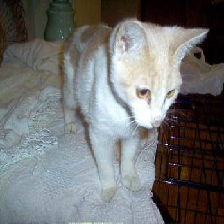

In [23]:
# 하나의 이미지를 테스트 함

img = keras.preprocessing.image.load_img(
    '/content/cats_and_dogs/test/cats/cat.2300.jpg',
    target_size=(img_height, img_width)
)
img

In [24]:
img_array = keras.preprocessing.image.img_to_array(img)

# 축추가 - 하나의 이미지를 예측하더라도 배치형태이어야 한다
# img_array = tf.expand_dims(img_array, 0)
img_array = img_array.reshape(-1, 224, 224, 3)  # Create batch axis
img_array.shape


(1, 224, 224, 3)

In [25]:
y_pred = model.predict(img_array)
score = y_pred[0]
score

# 0.5보다 작으면 고양이, 크면 강아지

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


array([1.1094891e-06], dtype=float32)

# 이미지 증강 사용

In [26]:
# 전처리 레이어
from keras import layers

resize_and_rescale = keras.Sequential([
  layers.Resizing(224, 224),
  layers.Rescaling(1./255),
], name='resize_rescaling')

In [27]:
# 데이터 증강 레이어를 구성한다.

data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"), # 수평 뒤집기
        keras.layers.RandomRotation(0.2), # 무작위 회전
        layers.RandomZoom(0.2), # 무작위 확대 혹은 축소
        layers.RandomContrast(0.2), # 대비 변경
        layers.RandomBrightness(0.2), # 밝기 변경
        layers.RandomTranslation(0.2, 0.2), # 평행 이동
        # Add more data augmentation layers as needed
    ], name='augmentation'
)

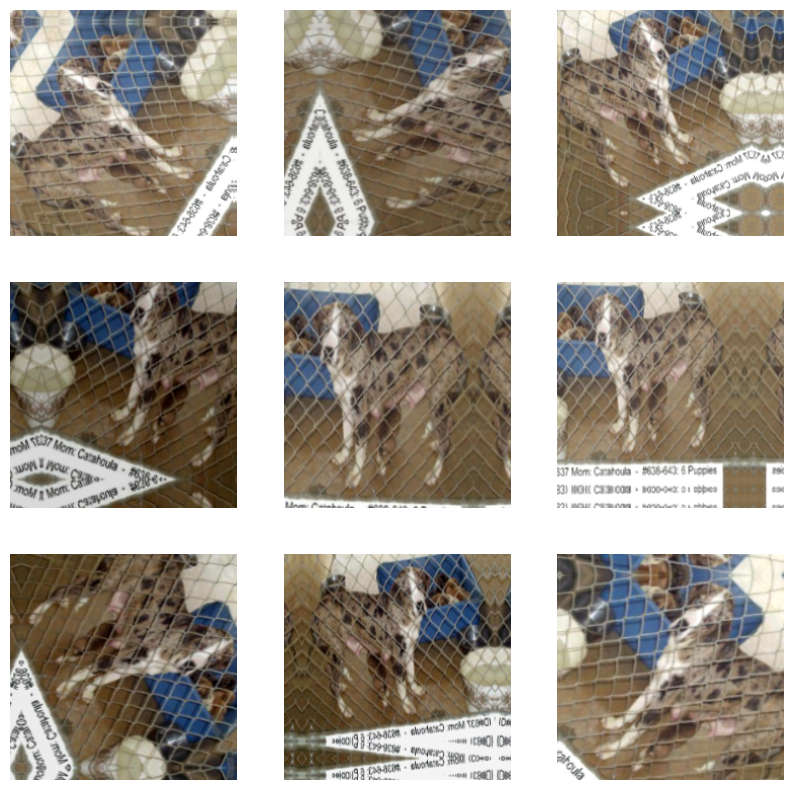

In [28]:
# 데이터 증강 시각화

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

-  모델에 데이터 증강을 사용하는 방법  
이 방법을 사용하면 테스트 데이터에도 그냥 별도의 처리없이 바로 예측에 적용할 수 있다.

```
inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1./255)(x)
...  # Rest of the model

```

In [29]:
# generate dummy data
input_dim = (224,224,3)

In [30]:
from keras import layers

def build_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # 본격적으로 모델에 입력하기 전에 여기서 augmentation이 진행
    # inference time에는 동작X

    # 앞에서 만들어 논 레이어 두개를 먼저 때린다
    x = data_augmentation(inputs)
    x = resize_and_rescale(x)

    # [0, 1] 변환을 위해 Rescaling Layer를 활용
    x = layers.Rescaling(1.0 / 255)(x)

    # CNN 모델
    x = layers.Conv2D(32, 3, activation='relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(32, 3, activation='relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(32, 3, activation='relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs, outputs)
    return model

In [31]:
# 이 모델은 서머리를 보기위해서는 빌드를 해야한다.
model = build_model(input_dim)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ augmentation (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resize_rescaling (Sequential)        │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       2,769,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,788,545 (10.64 MB)

 Trainable params: 2,788,545 (10.64 MB)

 Non-trainable params: 0 (0.00 B)

## 모델 학습

In [32]:
model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss="binary_crossentropy",
              metrics=["accuracy"])


In [33]:
EPOCHS = 10

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=EPOCHS
)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.4780 - loss: 0.6938 - val_accuracy: 0.4942 - val_loss: 0.6932
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.4875 - loss: 0.6932 - val_accuracy: 0.4942 - val_loss: 0.6931
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.4957 - loss: 0.6932 - val_accuracy: 0.4942 - val_loss: 0.6932
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.4938 - loss: 0.6932 - val_accuracy: 0.4942 - val_loss: 0.6932
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.4977 - loss: 0.6932 - val_accuracy: 0.4942 - val_loss: 0.6932
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.4901 - loss: 0.6932 - val_accuracy: 0.4942 - val_loss: 0.6932
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.4952 - loss: 0.6932 - val_accuracy: 0.4942 - val_loss: 0.6932
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.4990 - loss: 0.6932 - val_accuracy: 0.4942 - 

## 예측 및 평가

In [34]:
# inference time에는 Dropout과 data augmentation이 비활성화 상태가 됨
# 하지만 Rescaling layer는 그대로 활용되기 때문에 테스트용 데이터로 추론을 진행할 때 올바른 결과를 얻을 수 있음.

In [35]:
results = model.evaluate(test_ds)
results

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.5133 - loss: 0.6931


[0.6931493282318115, 0.5]

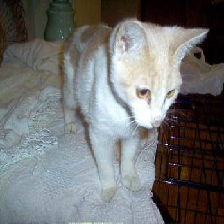

In [36]:
# 한개의 이미지를 예측한다

img = keras.preprocessing.image.load_img(
    '/content/cats_and_dogs/test/cats/cat.2300.jpg',
    target_size=(img_height, img_width)
)

img

In [37]:
img_array = keras.preprocessing.image.img_to_array(img)

img_array = img_array.reshape(-1, 224, 224, 3)
img_array.shape


(1, 224, 224, 3)

In [38]:
y_pred = model.predict(img_array)
score = y_pred[0]
score

# 0.5보다 작으면 고양이, 크면 강아지; 증강했을 때 확률이 더 줄어들었음. 증강한다고 무조건 좋은 건 아닌 듯. 아님 방법이 틀렸거나.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


array([0.49895683], dtype=float32)